CUSTOMER SEGMENTATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# READ DATA FROM CSV FILE
data_cs = pd.read_csv("Mall_Customers.csv")
print(data_cs)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [3]:
print(data_cs.head(15))
print(data_cs.shape)
data_cs.describe()

    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0            1    Male   19                  15                      39
1            2    Male   21                  15                      81
2            3  Female   20                  16                       6
3            4  Female   23                  16                      77
4            5  Female   31                  17                      40
5            6  Female   22                  17                      76
6            7  Female   35                  18                       6
7            8  Female   23                  18                      94
8            9    Male   64                  19                       3
9           10  Female   30                  19                      72
10          11    Male   67                  19                      14
11          12  Female   35                  19                      99
12          13  Female   58                  20                 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
# chexk null values
print(data_cs.isnull().sum())
data_cs.info()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# EXTRACTING COLUMN 3 AND 4
x = data_cs.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [7]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  km = KMeans(n_clusters=i, init='k-means++', random_state=42)
  km.fit(x)

  wcss.append(km.inertia_)

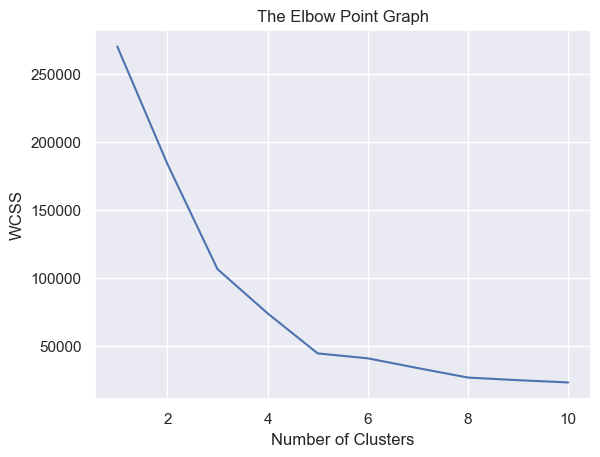

In [8]:
# PLOT ON ELBOW GRAPH

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

TRAINING K-MEANS CLUSTER

In [9]:
km = KMeans(n_clusters=5, init='k-means++', random_state=42)

# return a label for each data point based on their cluster
Y = km.fit_predict(x)

print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [14]:
# Assign cluster labels to the original dataset
data_cs['Cluster'] = Y 

# Show the first 10 rows of the dataset with assigned clusters
print(data_cs[['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)','Cluster']].head(10))
data_cs.to_csv("Segmented_Customers.csv", index=False)
print("Segmented customer data saved successfully!")

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   
5           6  Female   22                  17                      76   
6           7  Female   35                  18                       6   
7           8  Female   23                  18                      94   
8           9    Male   64                  19                       3   
9          10  Female   30                  19                      72   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  
5        2  
6        4  
7        2  
8        4  
9        2  
Segmented customer data saved successfully

Visualization 

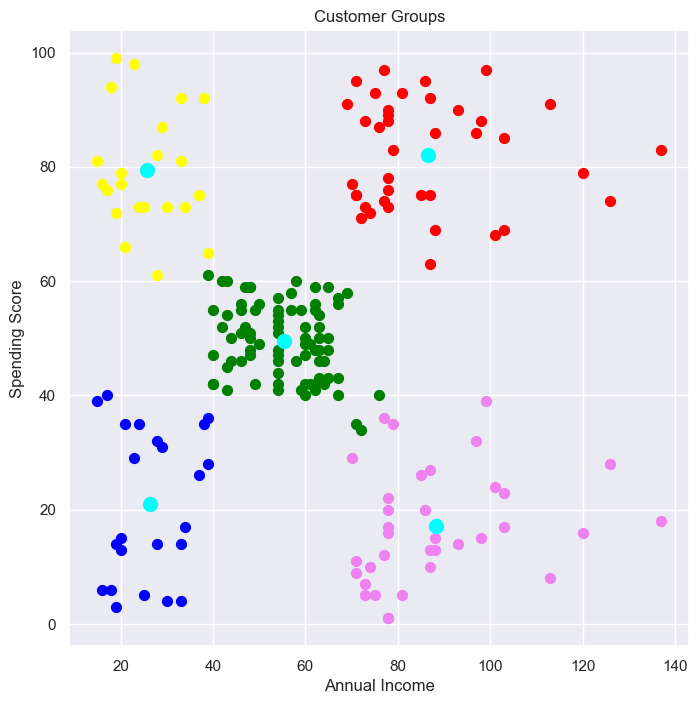

In [15]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(x[Y==0,0], x[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x[Y==1,0], x[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(x[Y==2,0], x[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(x[Y==3,0], x[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(x[Y==4,0], x[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()